### Load the necessary libraries

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Let's read in the dataset for preprocessing
df = pd.read_csv('ShopSphere_Dataset.csv', parse_dates = ['InvoiceDate'])
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States
...,...,...,...,...,...,...,...,...
385309,420989,2024-10-11 09:01:10,14371,40623,Groceries,35,20.17,United States
385310,420989,2024-10-11 09:01:10,14371,40504,Sports & Outdoors,54,37.31,United States
385311,420989,2024-10-11 09:01:10,14371,40189,Home & Living,83,18.24,United States
385312,420989,2024-10-11 09:01:10,14371,40299,Beauty & Wellness,100,39.94,United States


### Exploratory Data Analysis

In [3]:
#Let's inspect the information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385314 entries, 0 to 385313
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    385314 non-null  int64         
 1   InvoiceDate  385314 non-null  datetime64[ns]
 2   CustomerID   385314 non-null  int64         
 3   StockCode    385314 non-null  int64         
 4   Description  385314 non-null  object        
 5   Quantity     385314 non-null  int64         
 6   UnitPrice    385314 non-null  float64       
 7   Country      385314 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 23.5+ MB


In [4]:
#Let's check the size and shape of the DataFrame
shape_info = pd.DataFrame({
    'rows' : [len(df)],
    'Columns' : (df.shape[1])
})

shape_info

,rows,Columns
0,385314,8


In [5]:
#Let's check for NAN values in the DataFrame
df.isna().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [6]:
#Let's convert the CustomerID to object
df['CustomerID'] = df['CustomerID'].astype(str)

In [7]:
df.dtypes

InvoiceNo               int64
InvoiceDate    datetime64[ns]
CustomerID             object
StockCode               int64
Description            object
Quantity                int64
UnitPrice             float64
Country                object
dtype: object

In [8]:
#Let's create a revenue column for the dataset
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom,172.36
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom,488.04
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States,7183.68
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States,268.10
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States,30.64
...,...,...,...,...,...,...,...,...,...
385309,420989,2024-10-11 09:01:10,14371,40623,Groceries,35,20.17,United States,705.95
385310,420989,2024-10-11 09:01:10,14371,40504,Sports & Outdoors,54,37.31,United States,2014.74
385311,420989,2024-10-11 09:01:10,14371,40189,Home & Living,83,18.24,United States,1513.92
385312,420989,2024-10-11 09:01:10,14371,40299,Beauty & Wellness,100,39.94,United States,3994.00


In [9]:
#Let's check the total number of unique customers and unique transactions and the date range the transactions were made
num_customers = df['CustomerID'].nunique()
num_transactions = df['InvoiceNo'].nunique()
date_range = (df['InvoiceDate'].min(), df['InvoiceDate'].max())

In [10]:
print(f'Total number of unique customers is {num_customers}')
print(f'Total number of unique transactions is {num_transactions}')
print(f'Date range is {date_range[0]} to {date_range[1]}')

Total number of unique customers is 4372
Total number of unique transactions is 20990
Date range is 2023-12-01 00:25:31 to 2024-12-31 23:52:56


In [11]:
#Lets check the average revenue
average_revenue = df['Revenue'].mean()
average_revenue

2341.7934992499618

In [12]:
top_countries = (
    df.groupby('Country', as_index=False)['CustomerID']
      .nunique()
      .rename(columns={'CustomerID':'UniqueCustomers'})
      .sort_values('UniqueCustomers', ascending=False)
)

print(top_countries.head())

          Country  UniqueCustomers
1   United States             4372
0  United Kingdom             4359


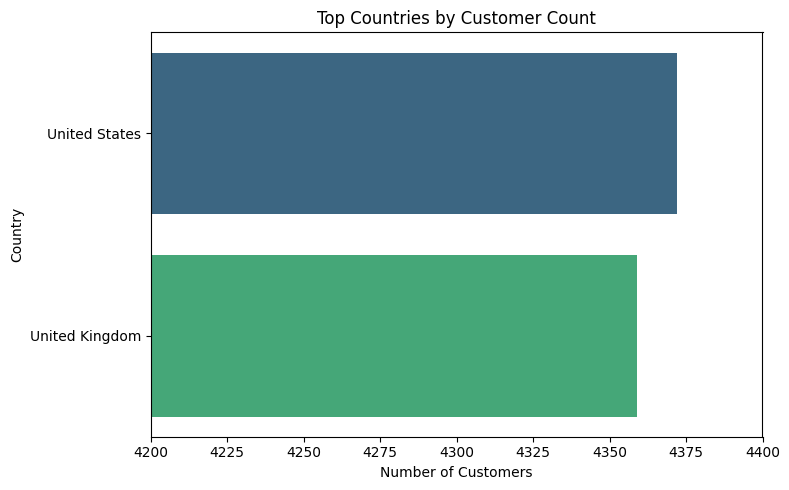

In [13]:
plt.figure(figsize=(8,5))
sns.barplot(top_countries, x='UniqueCustomers', y='Country', hue = 'Country', palette = 'viridis', legend = False)
plt.title('Top Countries by Customer Count')
plt.xlabel('Number of Customers')
plt.xlim(4200, 4400)
plt.ylabel('Country')
plt.tight_layout()
plt.show()

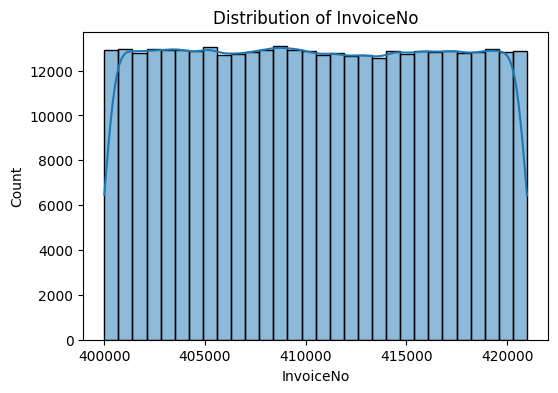

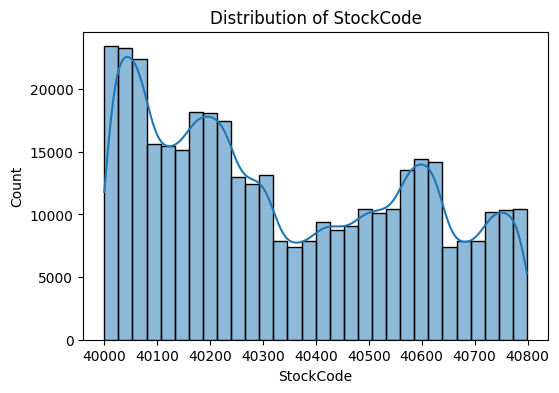

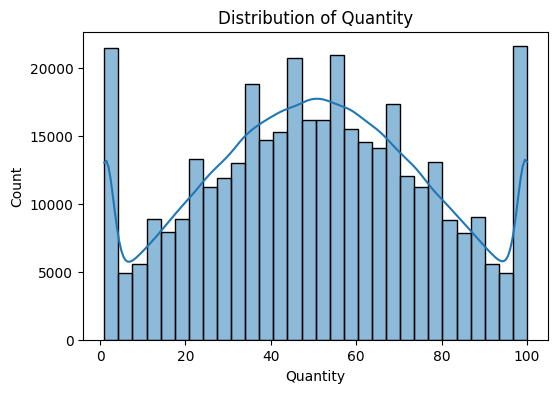

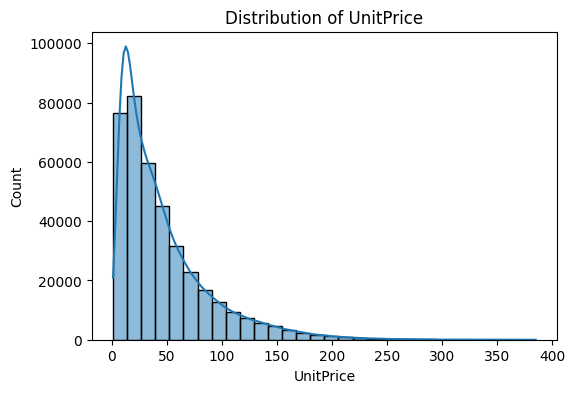

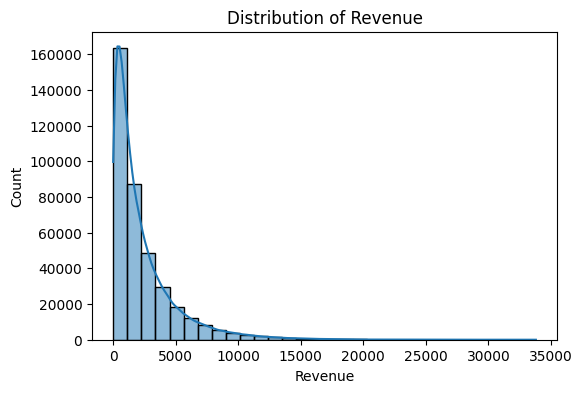

In [14]:
num_cols = df.select_dtypes(include=np.number).columns
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

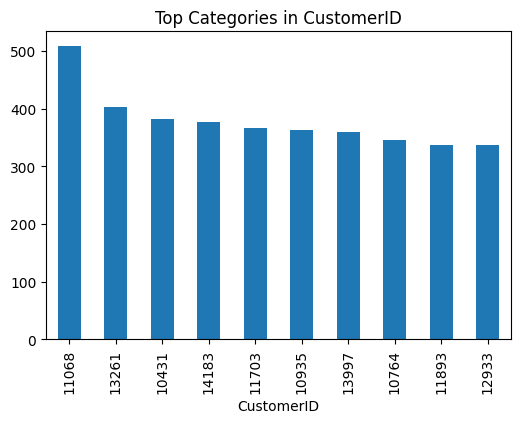

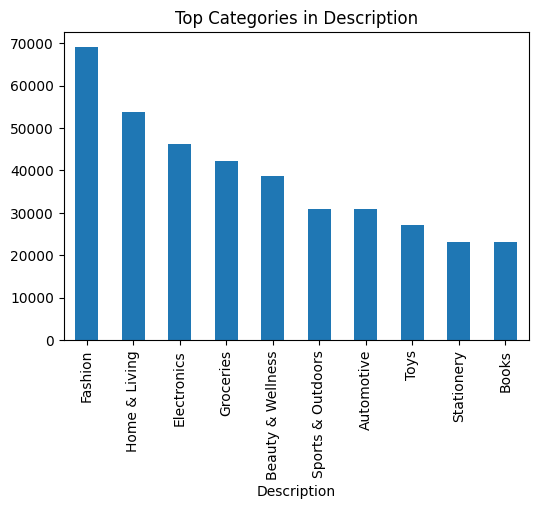

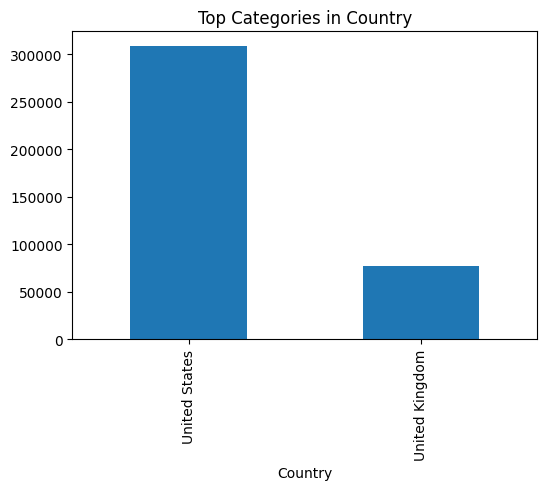

In [15]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top Categories in {col}")
    plt.show()

In [16]:
#Let's see the monthly sales trend
monthly_sales = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()
monthly_sales

InvoiceDate
2023-12     625761
2024-01     710006
2024-02     811878
2024-03     993439
2024-04    1145555
2024-05    1323768
2024-06    1435517
2024-07    1579314
2024-08    1787971
2024-09    1962638
2024-10    2085419
2024-11    2477067
2024-12    2521289
Freq: M, Name: Quantity, dtype: int64

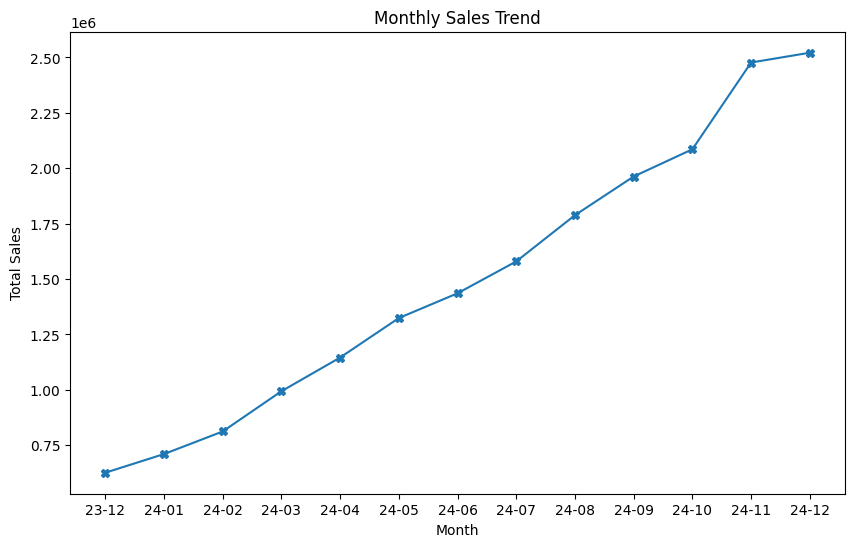

In [17]:
#Let's visualize this using a line plot
plt.figure(figsize = (10, 6))
plt.plot(monthly_sales.index.strftime('%y-%m'), monthly_sales.values, marker='X', linestyle='-' )
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.show()

### Cohort Analysis

#### Cohort analysis groups customers based on when they first make a purchase (first purchase month) and tracks how long they stay active afterward. This answers how well a customer is being managed after acquisition over a given period.

#### In this project, we'll group customers based on their CohortMonth (first month of purchase) and track how many come back to make a purchase again after their first engagement. We'll visualize this with a retention heatmap to show drop-offs across months.

In [18]:
#Step 1: Let's create an InvoiceMonth from the InvoiceDate Column
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,InvoiceMonth
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom,172.36,2024-01
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom,488.04,2024-01
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States,7183.68,2024-01
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States,268.10,2024-01
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States,30.64,2024-01


In [19]:
#Step 2: Let's create the cohortMonth (the first month of purchase per customer)
cohort_data = df.groupby('CustomerID')['InvoiceMonth'].min()
cohort_data.name = 'CohortMonth'

In [20]:
# #Step 2.1: Let's map the variable created to the main dataframe
# df['CohortMonth'] = df['CustomerID'].map(cohort_data)
# df.tail()

In [21]:
#Step 3: Let's merge the CohortMonth back to the main DataFrame (df)
df = df.merge(cohort_data, on = 'CustomerID')
df.tail()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,InvoiceMonth,CohortMonth
385309,420989,2024-10-11 09:01:10,14371,40623,Groceries,35,20.17,United States,705.95,2024-10,2024-05
385310,420989,2024-10-11 09:01:10,14371,40504,Sports & Outdoors,54,37.31,United States,2014.74,2024-10,2024-05
385311,420989,2024-10-11 09:01:10,14371,40189,Home & Living,83,18.24,United States,1513.92,2024-10,2024-05
385312,420989,2024-10-11 09:01:10,14371,40299,Beauty & Wellness,100,39.94,United States,3994.00,2024-10,2024-05
385313,420989,2024-10-11 09:01:10,14371,40029,Fashion,86,27.04,United States,2325.44,2024-10,2024-05


In [22]:
#Step 4: Let's derive the CohortIndex
#To do this, we'll first pull out the year and month for the customers from the invoiceMonth and CohortMonth
invoice_year, invoice_month = df['InvoiceMonth'].dt.year, df['InvoiceMonth'].dt.month
cohort_year, cohort_month = df['CohortMonth'].dt.year, df['CohortMonth'].dt.month

In [23]:
#Let's find the difference in year and month, this will allow us to be able to find the cohortIndex
diff_year = invoice_year - cohort_year
diff_month = invoice_month - cohort_month

In [24]:
#Since we have gotten the year and month difference, let's create and compute the CohortIndex and it's column
df['CohortIndex'] = diff_year * 12 + diff_month + 1
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,Revenue,InvoiceMonth,CohortMonth,CohortIndex
0,400000,2024-01-21 03:01:47,10000,40565,Groceries,31,5.56,United Kingdom,172.36,2024-01,2024-01,1
1,400000,2024-01-21 03:01:47,10000,40048,Fashion,14,34.86,United Kingdom,488.04,2024-01,2024-01,1
2,400000,2024-01-21 03:01:47,10000,40149,Electronics,48,149.66,United States,7183.68,2024-01,2024-01,1
3,400000,2024-01-21 03:01:47,10000,40514,Sports & Outdoors,7,38.30,United States,268.10,2024-01,2024-01,1
4,400000,2024-01-21 03:01:47,10000,40607,Groceries,4,7.66,United States,30.64,2024-01,2024-01,1


In [25]:
#Step 5: Let's build a cohort count
#To achieve this, we'll count the number of unique customers according to their CohortMonth and CohortIndex
cohort_count = df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

In [26]:
#Let's create a pivot table to show the CohortIndex and CohortMonth 
cohort_pivot = cohort_count.pivot(
    index = 'CohortMonth',
    columns = 'CohortIndex',
    values = 'CustomerID'
)
cohort_pivot

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2023-12,344.0,79.0,73.0,97.0,90.0,90.0,95.0,100.0,96.0,118.0,94.0,138.0,83.0
2024-01,329.0,78.0,94.0,93.0,76.0,92.0,88.0,84.0,90.0,101.0,87.0,131.0,NaN
2024-02,337.0,86.0,95.0,94.0,83.0,96.0,82.0,99.0,94.0,109.0,106.0,NaN,NaN
2024-03,334.0,73.0,86.0,99.0,91.0,98.0,88.0,95.0,106.0,98.0,NaN,NaN,NaN
2024-04,334.0,101.0,86.0,92.0,96.0,103.0,93.0,92.0,91.0,NaN,NaN,NaN,NaN
2024-05,349.0,91.0,81.0,94.0,103.0,102.0,109.0,90.0,NaN,NaN,NaN,NaN,NaN
2024-06,312.0,76.0,74.0,80.0,82.0,98.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-07,347.0,107.0,82.0,89.0,98.0,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08,335.0,81.0,80.0,92.0,93.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Step 6: Let's derive the retention rate
#Since we have created the pivot table, which is needed for our retention rate
#Now, let's create the retention rate
cohort_size = cohort_pivot.iloc[:,0]
retention_rate = cohort_pivot.divide(cohort_size, axis = 0).round(3)
retention_rate

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2023-12,1.0,0.230,0.212,0.282,0.262,0.262,0.276,0.291,0.279,0.343,0.273,0.401,0.241
2024-01,1.0,0.237,0.286,0.283,0.231,0.280,0.267,0.255,0.274,0.307,0.264,0.398,NaN
2024-02,1.0,0.255,0.282,0.279,0.246,0.285,0.243,0.294,0.279,0.323,0.315,NaN,NaN
2024-03,1.0,0.219,0.257,0.296,0.272,0.293,0.263,0.284,0.317,0.293,NaN,NaN,NaN
2024-04,1.0,0.302,0.257,0.275,0.287,0.308,0.278,0.275,0.272,NaN,NaN,NaN,NaN
2024-05,1.0,0.261,0.232,0.269,0.295,0.292,0.312,0.258,NaN,NaN,NaN,NaN,NaN
2024-06,1.0,0.244,0.237,0.256,0.263,0.314,0.276,NaN,NaN,NaN,NaN,NaN,NaN
2024-07,1.0,0.308,0.236,0.256,0.282,0.297,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08,1.0,0.242,0.239,0.275,0.278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


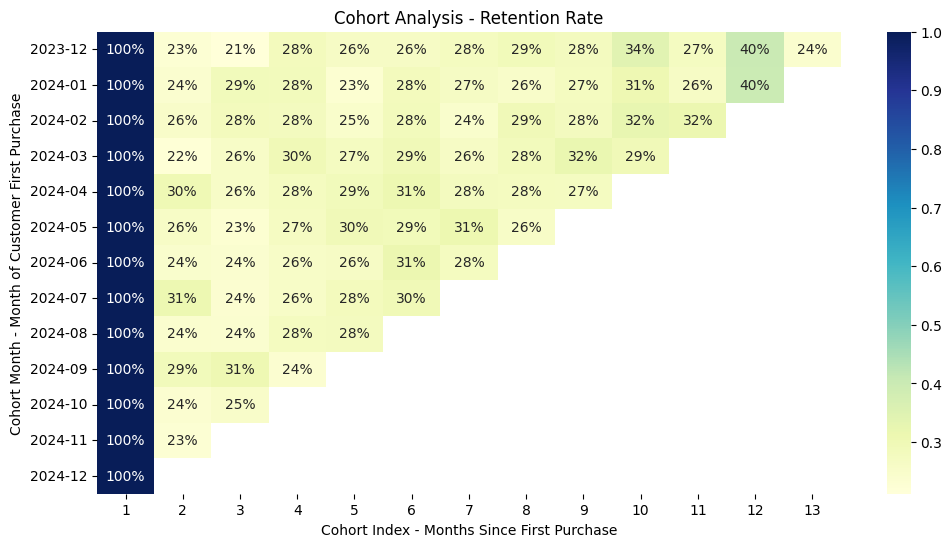

In [28]:
#Step 7: Let's create a retention heatmap to visualize better and understand the result of the retention rate
plt.figure(figsize = (12, 6))
sns.heatmap(retention_rate, annot = True, fmt = '.0%', cmap = 'YlGnBu')
plt.title('Cohort Analysis - Retention Rate')
plt.xlabel('Cohort Index - Months Since First Purchase')
plt.ylabel('Cohort Month - Month of Customer First Purchase')
plt.show()

### RFM Analysis

#### In this step, we will be calculating the RFM. This is an evaluation metric used for Cohort Analysis. It is defined as:

##### Recency (R) - How often a customer makes their last purchase, lower is always better
##### Frequency (F) - How often a customer makes purchases, higher is always better
##### Monetary (M) - How much a customer spends in total during their purchase, higher is also better

#### We will calculate these per customer using InvoiceDate and Revenue, then assign RFM scores to rank them.

In [29]:
#Step 1: Define a reference date
#The first important step here is to set a reference date. This set a reference point in time, one day after the most
#recent transaction.
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f'Reference Date: {reference_date}')

Reference Date: 2025-01-01 23:52:56


In [30]:
#Step 2: Let's aggregate the RFM metrics
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x: (reference_date - x.max()).days,
    'InvoiceNo' : pd.Series.nunique,
    'Revenue' : 'sum'
}).reset_index()

In [31]:
#Let's Create a RFM Dataframe
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,10000,140,5,242993.87
1,10001,86,1,20841.75
2,10002,23,6,254693.19
3,10003,89,2,115314.08
4,10004,100,7,305794.35


In [32]:
from sklearn.preprocessing import StandardScaler

#Let's standardize our RFM metrics to give a mean of zero(0) and a standard deviation of one (1)
X = rfm[['Recency', 'Frequency', 'Monetary']].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
X_scaled

array([[ 1.07915363,  0.06017119,  0.25019975],
       [ 0.26375028, -1.14933883, -1.26817781],
       [-0.68755362,  0.36254869,  0.33016291],
       ...,
       [-0.37045232, -1.14933883, -1.05706758],
       [-0.86875437,  1.57205871,  1.76664742],
       [ 0.20335003,  0.06017119,  0.20268637]])

In [34]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
sil_scores = []
k_range = range(2,11)
for k in k_range:
    km = KMeans(n_clusters = k, random_state = 42, n_init = 10)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))
    

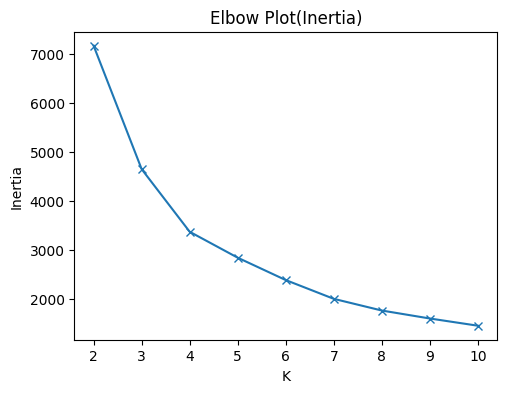

In [35]:
#Let's visualize the Elbow plot
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(k_range, inertia, marker = 'x')
plt.title('Elbow Plot(Inertia)')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

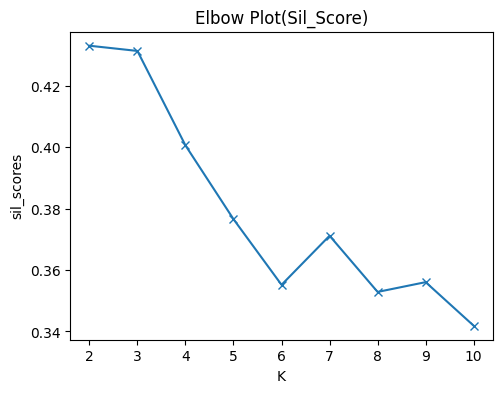

In [36]:
#Let's visualize the Elbow plot
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(k_range, sil_scores, marker = 'x')
plt.title('Elbow Plot(Sil_Score)')
plt.xlabel('K')
plt.ylabel('sil_scores')
plt.show()

In [37]:
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(2, 10))

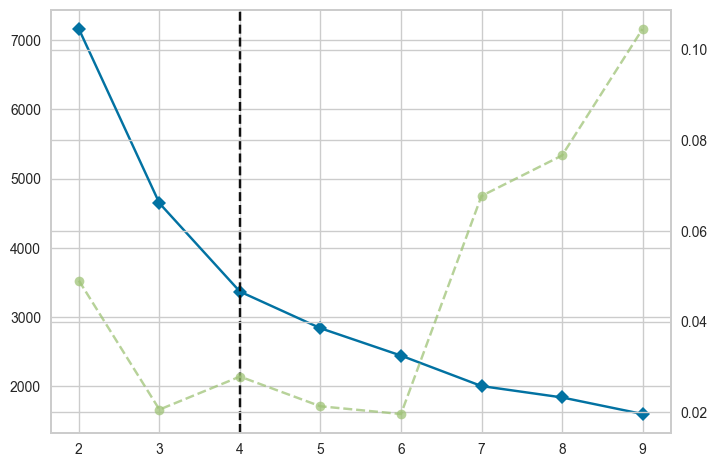

In [38]:
model = KMeans(random_state=42)

visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X_scaled)

In [39]:
#Let's train the K-Means Clustering Algorithm
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [40]:
#Let's add the clustering results back into the rfm table we made earlier
rfm['Clusters'] = kmeans.labels_
rfm.head()

,CustomerID,Recency,Frequency,Monetary,Clusters
0,10000,140,5,242993.87,2
1,10001,86,1,20841.75,1
2,10002,23,6,254693.19,0
3,10003,89,2,115314.08,1
4,10004,100,7,305794.35,0


In [41]:
#Let's profile and summarize each cluster's behaviour
cluster_profile = rfm.groupby('Clusters').agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : 'mean',
    'CustomerID' : 'count'
}).rename(columns={'CustomerID' : 'NumCustomers'}).round(1)

In [42]:
cluster_profile

,Recency,Frequency,Monetary,NumCustomers
Clusters,,,,
0,47.1,6.3,269730.0,1367
1,45.0,2.4,99169.9,1733
2,186.8,2.9,125700.8,719
3,41.5,11.2,490713.6,553


### Segmentation Analysis

#### Segmentation Analysis groups customers into distinct clusters based on patterns in their RFM metrics. It explains which types of customers exist in the database, and how we should treat them differently.

#### We applied K-Means Clustering on scaled RFM features, and the model found 4 clusters, which we are going to segment our customers into. This segmentation converts numbers into personas we can act on for personalization, targeted campaigns, and tailored retention strategies for our various customer segments.

In [43]:
#Let's associate name values to the clusters
cluster_name = {
    0 : 'VIPs',
    1 : 'Loyal Regulars',
    2 : 'At Risk/lost',
    3 : 'V-VIPs'
}

In [44]:
#Let's segments these clusters to the associated name given to them
cluster_profile['Segments'] = cluster_profile.index.map(cluster_name)
cluster_profile

,Recency,Frequency,Monetary,NumCustomers,Segments
Clusters,,,,,
0,47.1,6.3,269730.0,1367,VIPs
1,45.0,2.4,99169.9,1733,Loyal Regulars
2,186.8,2.9,125700.8,719,At Risk/lost
3,41.5,11.2,490713.6,553,V-VIPs


In [45]:
cluster_profile.columns

Index(['Recency', 'Frequency', 'Monetary', 'NumCustomers', 'Segments'], dtype='object')

In [46]:
#Let's apply a method to normalize (rescale the cluster averages) each feature to a range of 0-1. 
#This will allow us to compare patterns rather than the magnitude of each feature, as they are on different numeric scales.
df_plot = cluster_profile.copy()
df_plot[['Recency', 'Frequency', 'Monetary']] = (
    df_plot[['Recency', 'Frequency', 'Monetary']].apply(lambda x: x /x.max())
)
df_plot

,Recency,Frequency,Monetary,NumCustomers,Segments
Clusters,,,,,
0,0.252141,0.562500,0.549669,1367,VIPs
1,0.240899,0.214286,0.202093,1733,Loyal Regulars
2,1.000000,0.258929,0.256159,719,At Risk/lost
3,0.222163,1.000000,1.000000,553,V-VIPs


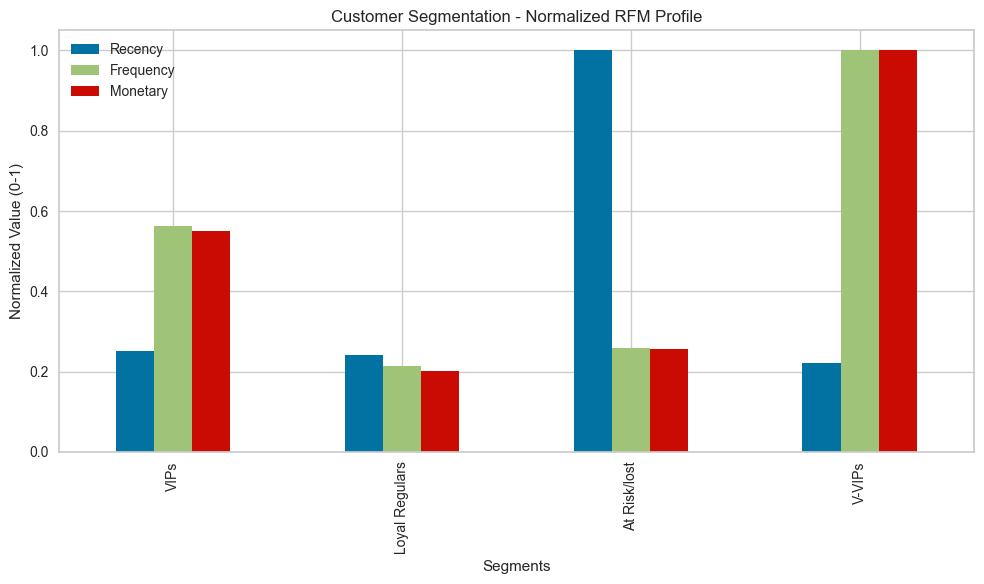

In [47]:
df_plot.set_index('Segments')[['Recency', 'Frequency', 'Monetary']].plot(kind = 'bar', figsize = (10,6))
plt.title('Customer Segmentation - Normalized RFM Profile')
plt.ylabel('Normalized Value (0-1)')
plt.tight_layout()
plt.show()

### In conclusion:
#### Cohort Analysis helps us understand when we lose customers, RFM Analysis helps us identify who among our customers matters the most, and Segmentation Analysis tells us how to treat the different segments of customers we have acquired based on their purchasing behaviours.